In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import pyplot 
import seaborn
%matplotlib inline 

In [125]:
df=pd.read_excel("C:\\Users\Dell\Downloads\candyhierarchy2017.xlsx")

In [256]:
df.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | Any full-sized candy bar,Q6 | Box'o'Raisins,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,...,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Nestle Crunch,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Snickers,Q6 | Starburst,Q6 | Twix
1,90272821,No,MALE,44.0,USA,NM,JOY,DESPAIR,DESPAIR,MEH,...,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY
3,90272840,No,MALE,40.0,USA,or,JOY,DESPAIR,MEH,MEH,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,JOY,MEH,JOY
7,90272854,No,MALE,33.0,Canada,ontario,JOY,MEH,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY
8,90272858,No,MALE,40.0,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY
9,90272859,No,Female,53.0,USA,Wa,JOY,MEH,MEH,DESPAIR,...,MEH,MEH,JOY,MEH,MEH,JOY,JOY,MEH,MEH,JOY


In [9]:
df.shape

(2460, 120)

In [168]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [47]:
df.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [48]:
df["Q2: GENDER"].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [73]:
c=set([i for i in df['Q4: COUNTRY']  if (type(i)==str and (i[0]=='u' and i[1]=='s'))])

d={}
for i in c :
    d[i]='USA'




In [76]:
c=set([i for i in df['Q4: COUNTRY']  if (type(i)==str and (i[0]=='U' and i[1]=='S'))])
for i in c :
    d[i]='USA'

In [95]:
c=set([i for i in df['Q4: COUNTRY']  if (type(i)==str and (if 's' is in i))])
for i in c :
    d[i]='USA'

SyntaxError: invalid syntax (<ipython-input-95-897ba8dc02fe>, line 1)

In [96]:
print(d)

{'usas': 'USA', 'us': 'USA', 'usa': 'USA', 'USa': 'USA', 'USA! USA! USA!': 'USA', 'US of A': 'USA', 'USA ': 'USA', 'US': 'USA', 'USA': 'USA', 'USSA': 'USA', 'USA? Hard to tell anymore..': 'USA', 'USA USA USA!!!!': 'USA', 'USAA': 'USA', 'USAUSAUSA': 'USA', 'Us': 'USA', 'Usa': 'USA', 'Usa ': 'USA'}


In [92]:
cnt=0
for i in d.keys() :
    cnt+=1
cnt

17

In [130]:
df['Q4: COUNTRY'].unique()

array([None, 'USA', 'canada', 'Canada', 'Murica', 'uk', 'United Kingdom',
       'UAE', 'England', 'UK', 'canada ', 'Mexico', 'america', 'france',
       'finland', 'Canada ', 'North Carolina ', 'Netherlands', 'germany',
       'Europe', 'Earth', 'U.K. ', 'Costa Rica', 'cascadia',
       'insanity lately', 'Greece', "'merica", 'France', 'A', 'Can',
       'Canae', 'New York', 'Ireland', 'Korea', 'California', 'Japan',
       'Uk', 'Iceland', 'Germany', 'Canada`', 'Scotland', 'UK ',
       'Denmark', 'France ', 'Switzerland', 'Ahem....Amerca', 'UD',
       'Scotland ', 'New Jersey', 'CANADA', 'Indonesia', 'America',
       'The Netherlands', 'endland', 'Atlantis', 'murrika', 'Alaska',
       'N. America', 'Singapore', 'China', 'Taiwan', 'Ireland ',
       'hong kong', 'spain', 'Sweden', 'Hong Kong', 'Narnia',
       'United kingdom', "I don't know anymore", 'Fear and Loathing'],
      dtype=object)

In [174]:
def m (x):
    if (type(x)==str):
        if('U' in x and 's' in x):
            return 'USA'
        elif('u' in x and 's' in x):
            return 'USA'
        elif('U' in x and 'S' in x):
            return 'USA'
        elif('u' in x and 'S' in x):
            return 'USA'
        elif(x=='New York' or x=='america'or x=='California'or x=='Ahem....Amerca'or x=='New Jersey'or x=='America'or x=='N. America'):
            return 'USA'
        elif(x=="'merica" or x=='A'  ):
            return 'USA'
        else :
            return x
        

In [208]:

df['Q4: COUNTRY']=df['Q4: COUNTRY'].map(m)

In [194]:
def c (x):
    if (type(x)==str):
        if('ana' in x or 'ANA' in x or 'Can' in x):
            return 'Canada'
        else :
            return x

In [196]:
df['Q4: COUNTRY']=df['Q4: COUNTRY'].map(c)

In [210]:
df['Q4: COUNTRY'].unique()

array([None, 'USA', 'Canada', 'Murica', 'Uk', 'UAE', 'Mexico', 'France',
       'finland', 'North Carolina ', 'Netherlands', 'Germany',
       'Costa Rica', 'cascadia', 'insanity lately', 'Greece', 'Ireland',
       'Korea', 'Japan', 'Iceland', 'Scotland', 'Denmark', 'France ',
       'Switzerland', 'Indonesia', 'The Netherlands', 'Atlantis',
       'Alaska', 'Singapore', 'China', 'Taiwan', 'Ireland ', 'spain',
       'Sweden', 'Narnia'], dtype=object)

In [209]:
df['Q4: COUNTRY'].nunique()

34

In [185]:
def K (x):
    if (type(x)==str):
        if('U' in x and 'K' in x):
            return 'Uk'
        elif('u' in x and 'K' in x):
            return 'Uk'
        elif('U' in x and 'k' in x):
            return 'Uk'
        elif('u' in x and 'k' in x):
            return 'Uk'
        elif (x=='England'or x=='endland'):
            return  'Uk'
        elif (x=='France'or x=='france'):
            return  'France'
        elif (x=='hong kong' or x=='Hong Kong'or x=='china'):
            return 'China'
    
        else :
            return x
df['Q4: COUNTRY']=df['Q4: COUNTRY'].map(K)


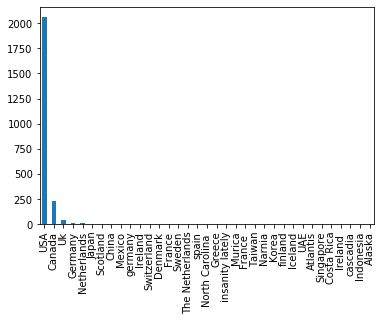

In [206]:
df['Q4: COUNTRY'].value_counts().plot('bar')

In [205]:
df['Q4: COUNTRY'].unique()

array([None, 'USA', 'Canada', 'Murica', 'Uk', 'UAE', 'Mexico', 'France',
       'finland', 'North Carolina ', 'Netherlands', 'germany',
       'Costa Rica', 'cascadia', 'insanity lately', 'Greece', 'Ireland',
       'Korea', 'Japan', 'Iceland', 'Germany', 'Scotland', 'Denmark',
       'France ', 'Switzerland', 'Indonesia', 'The Netherlands',
       'Atlantis', 'Alaska', 'Singapore', 'China', 'Taiwan', 'Ireland ',
       'spain', 'Sweden', 'Narnia'], dtype=object)

In [207]:
#any meaningless thing i will replace it wtih 'USA' just because the are stupids
def m (x):
    if (type(x)==str):
        if('U' in x and 's' in x):
            return 'USA'
        elif('u' in x and 's' in x):
            return 'USA'
        elif('U' in x and 'S' in x):
            return 'USA'
        elif('u' in x and 'S' in x):
            return 'USA'
        elif(x=='New York' or x=='america'or x=='California'or x=='Ahem....Amerca'or x=='New Jersey'or x=='America'or x=='N. America'):
            return 'USA'
        elif(x=="'merica" or x=='A'  ):
            return 'USA'
        elif(x=="I don't know anymore" or x=='Fear and Loathing'or x=='UD'or x=='Europe' or x=='Earth'):
            return 'USA'
        elif(x=='Scotland '):
            return 'Scotland'
        elif (x=="germany"):
            return 'Germany'
        
        else :
            return x
#yalhwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwy 

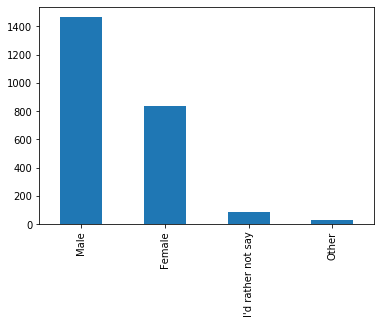

In [211]:
df["Q2: GENDER"].value_counts().plot('bar')

In [212]:
def map_gender(gender):
    if(gender =="Female"):
        return 'Female'
    else :
        return "MALE"

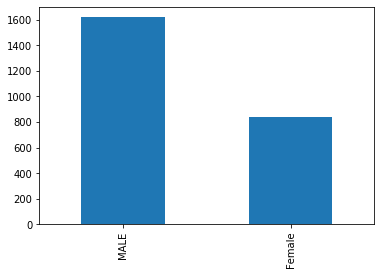

In [215]:
df["Q2: GENDER"]=df["Q2: GENDER"].map(map_gender);
df["Q2: GENDER"].value_counts().plot('bar')

In [219]:
#
c=df.columns
for i in c :
    if(df[i].isnull().sum()>=700):
        df.drop(i,axis=1,inplace=True)

In [226]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | Any full-sized candy bar,Q6 | Box'o'Raisins,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,...,Q6 | Milk Duds,Q6 | Milky Way,Q6 | Regular M&Ms,Q6 | Peanut M&M’s,Q6 | Nestle Crunch,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Snickers,Q6 | Starburst,Q6 | Twix
1,90272821,No,MALE,44,USA,NM,JOY,DESPAIR,DESPAIR,MEH,...,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY
3,90272840,No,MALE,40,USA,or,JOY,DESPAIR,MEH,MEH,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,JOY,MEH,JOY
7,90272854,No,MALE,33,Canada,ontario,JOY,MEH,JOY,JOY,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,MEH,MEH,JOY
8,90272858,No,MALE,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,DESPAIR,JOY
9,90272859,No,Female,53,USA,Wa,JOY,MEH,MEH,DESPAIR,...,MEH,MEH,JOY,MEH,MEH,JOY,JOY,MEH,MEH,JOY


In [218]:
df["Q3: AGE"].isnull().sum()

84

In [225]:
#looking on excel sheet i have noticed that alot of rows are empty so i decided to ramove any row with missing values 
df.dropna(axis=0,how='any',inplace=True)
df.shape

(1440, 38)

In [228]:
df["Q6 | Box'o'Raisins"].unique()

array(['DESPAIR', 'MEH', 'JOY'], dtype=object)

In [227]:
df.isnull().sum()

Internal ID                                                                    0
Q1: GOING OUT?                                                                 0
Q2: GENDER                                                                     0
Q3: AGE                                                                        0
Q4: COUNTRY                                                                    0
Q5: STATE, PROVINCE, COUNTY, ETC                                               0
Q6 | Any full-sized candy bar                                                  0
Q6 | Box'o'Raisins                                                             0
Q6 | Butterfinger                                                              0
Q6 | Cadbury Creme Eggs                                                        0
Q6 | Candy Corn                                                                0
Q6 | Candy that is clearly just the stuff given out for free at restaurants    0
Q6 | Cash, or other forms of

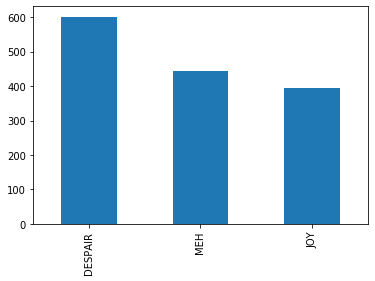

In [234]:
df['Q6 | Candy Corn'].value_counts().plot('bar')

In [237]:
df["Q1: GOING OUT?"].unique()

array(['No', 'Yes'], dtype=object)

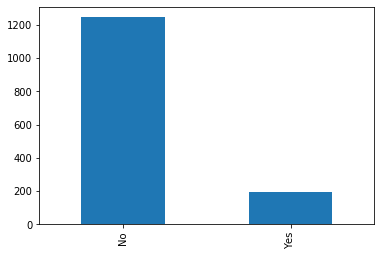

In [238]:
df["Q1: GOING OUT?"].value_counts().plot('bar')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 1 to 2459
Data columns (total 38 columns):
Internal ID                                                                    1440 non-null int64
Q1: GOING OUT?                                                                 1440 non-null object
Q2: GENDER                                                                     1440 non-null object
Q3: AGE                                                                        1424 non-null float64
Q4: COUNTRY                                                                    1440 non-null object
Q5: STATE, PROVINCE, COUNTY, ETC                                               1440 non-null object
Q6 | Any full-sized candy bar                                                  1440 non-null object
Q6 | Box'o'Raisins                                                             1440 non-null object
Q6 | Butterfinger                                                              1440 non-null 

In [242]:
df['Q3: AGE'].unique() 

array([44, 40, 33, 53, 64, 43, 37, 59, 48, 49, 34, 35, 38, 58, 50, 47, 52,
       41, 61, 46, 54, 62, 29, 42, 36, 32, 28, 45, 69, 67, 39, 25, 22, 51,
       70, 24, 27, 18, 19, 'Old enough', 57, 66, 56, 12, 'Many', 60, 55,
       65, '?', 11, 31, 'no', 68, 20, 21, 6, 10, 30, 63, 71, 13, 26,
       '45-55', 312, 72, 99, 'hahahahaha', 88, 74, 102, 'older than dirt',
       15, 8, 9, 23, 'Enough', 'See question 2', '24-50', 7, 14,
       'Over 50', 90, 76, 100, 1000, 'ancient', 16, 'OLD', 75,
       'MY NAME JEFF', 73, 'old enough',
       'I can remember when Java was a cool new language'], dtype=object)

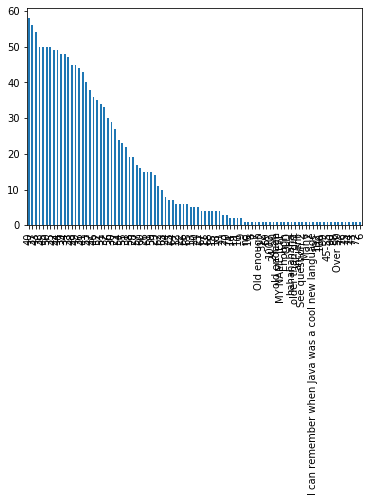

In [243]:

df['Q3: AGE'].value_counts().plot('bar')

In [249]:
def map_age(x):
    try :
        if(x>105):
            return np.nan
        return float(x)
    except :
        return np.nan
df['Q3: AGE']=df['Q3: AGE'].map(map_age)
df['Q3: AGE'].unique()


array([ 44.,  40.,  33.,  53.,  64.,  43.,  37.,  59.,  48.,  49.,  34.,
        35.,  38.,  58.,  50.,  47.,  52.,  41.,  61.,  46.,  54.,  62.,
        29.,  42.,  36.,  32.,  28.,  45.,  69.,  67.,  39.,  25.,  22.,
        51.,  70.,  24.,  27.,  18.,  19.,  nan,  57.,  66.,  56.,  12.,
        60.,  55.,  65.,  11.,  31.,  68.,  20.,  21.,   6.,  10.,  30.,
        63.,  71.,  13.,  26.,  72.,  99.,  88.,  74., 102.,  15.,   8.,
         9.,  23.,   7.,  14.,  90.,  76., 100.,  16.,  75.,  73.])

In [246]:
print(type(df['Q3: AGE']))

<class 'pandas.core.series.Series'>


In [254]:
df['Q3: AGE'].fillna(df['Q3: AGE'].mean(),inplace=True)

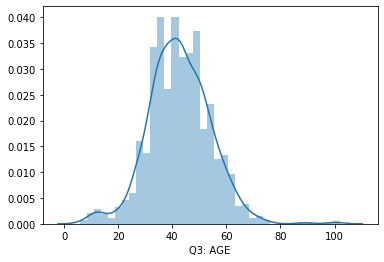

In [255]:
sns.distplot(df['Q3: AGE'])

In [236]:
c=df.columns
